##  CREDIT CARD DEFAULT PREDICTION

### Introduction

In the financial sector, predicting credit card default is a critical task for banks and lending institutions as it helps mitigate the risk of loan defaults and ensures financial stability. Credit card default occurs when a borrower fails to make the required minimum payment on their credit card balance, leading to significant financial losses for the issuing bank. Given the growing number of credit card holders and the inherent complexity of human financial behavior, predicting defaults based on historical data requires advanced techniques in data science and machine learning (ML).

#### Objective
The main objective of this project is to develop a predictive model that can estimate the probability of a customer defaulting on their credit card payments  
In this project, I aim to tackle this challenge using machine learning techniques to predict the likelihood of a customer defaulting on their credit card payments.This is a binary classification problem where the objective is to predict whether a customer will default on their credit card payments (default = 1) or not (no default = 0)..

. The dataset used for this project consists of several features such as age, income, credit limit, payment history, and previous credit card defaults, among others. These features provide valuable insights into a client’s financial behavior and can serve as critical indicators of potential default risk. By analyzing the patterns in these features, the project aims to create an accurate model that can predict whether a client is likely to default on their credit card payments.


##### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
###### LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
###### SEX: Gender (1 = male; 2 = female).
###### EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
###### MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).
###### AGE: Age (year).
###### PAY_0 - PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: PAY_0 = the repayment status in September, 2005; PAY_2 = the repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
###### BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005.
###### PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005.

This project aims to predict credit card default using machine learning techniques. It begins with essential data preprocessing steps, including handling missing values, detecting outliers and applying numerical scaling to standardize features. After preprocessing, few machine learning models like Logistic RegressionNaive BayesM)Decision Tree and , KNN,etc. are to be used to build predictive models, which are to be then evaluated using several metrics. The project demonstrates how machine learning can be leveraged to assist financial institutions in reducing credit risk and making informed decisions about credit approvals.


### Import necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE  # For oversampling
import joblib
import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [2]:
df = pd.read_csv("C:\\Users\\neenu\\Jupyter\\Assignments\\Final_Project\\Default_of_Credit_Card_Clients\\default_of_credit_card_clients.csv")
print(df)


          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [3]:
# Check the column names
print("Column names in the dataset:")
print(df.columns)

# Drop the 'ID' column if it exists
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])
else:
    print("No 'ID' column found in the dataset.")

Column names in the dataset:
Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [4]:
### Summary of data frame's structure

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [6]:
### Displays the first 5 rows of the DataFrame by default

In [7]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Displays the last 5 rows of the DataFrame by default

In [8]:
df.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,50000,1,2,1,46,0,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [9]:
df.shape

(30000, 24)

### Summary statistics of the numerical columns in a DataFrame.

In [10]:
df.describe(include='all')   

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.842267,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.744494,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### List of columns in the dataset

In [11]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### Checking whether the dataset contains any null values

In [12]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

### Checking whether the dataset contains any duplicate values

In [13]:
df.duplicated().sum()

35

In [14]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows in the dataset: {num_duplicates}")

# Display duplicate rows if they exist
if num_duplicates > 0:
    print("\nDuplicate rows:")
    print(df[duplicate_rows])
else:
    print("\nNo duplicate rows found.")

Number of duplicate rows in the dataset: 35

Duplicate rows:
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
1980      150000    2          1         1   38      1     -2     -2     -2   
4585      150000    2          1         1   31      1     -2     -2     -2   
6022      210000    2          1         2   39      1     -2     -2     -2   
6466      210000    2          2         1   49      1     -2     -2     -2   
7319      500000    1          1         1   43      1     -2     -2     -2   
8320      360000    1          2         1   41      1     -2     -2     -2   
10250      50000    1          2         2   26      1     -2     -2     -2   
13106     360000    2          1         1   49      1     -2     -2     -2   
14294      20000    1          2         2   24      2      2      4      4   
15458     160000    1          2         2   28     -2     -2     -2     -2   
15617     200000    2          2         2   26     -2     -2     -2  

In [15]:
# Drop duplicate rows and keep the first occurrence
df_cleaned = df.drop_duplicates()

# Verify the number of rows after dropping duplicates
print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")

Number of rows after removing duplicates: 29965


## **DATA VISUALIZATION**

In [16]:
df['default payment next month'].value_counts()


default payment next month
0    23364
1     6636
Name: count, dtype: int64

In [17]:
df['AGE'].value_counts()

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: count, dtype: int64

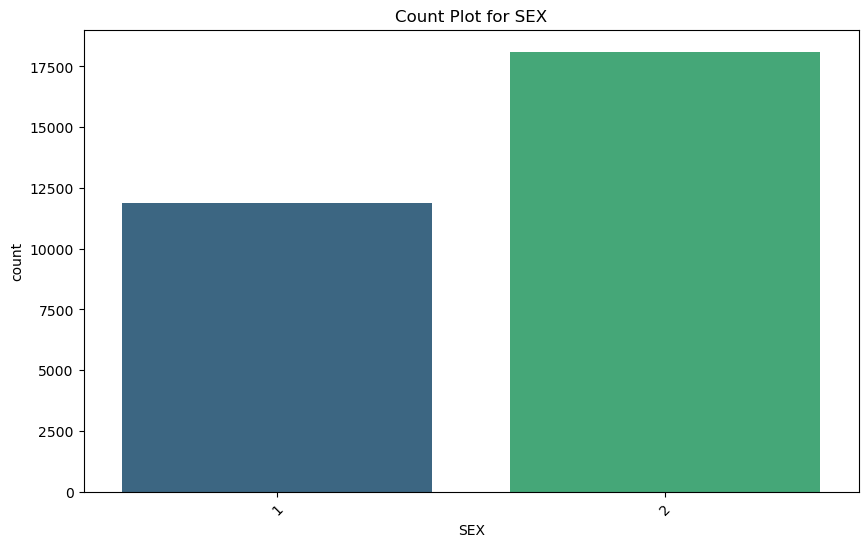

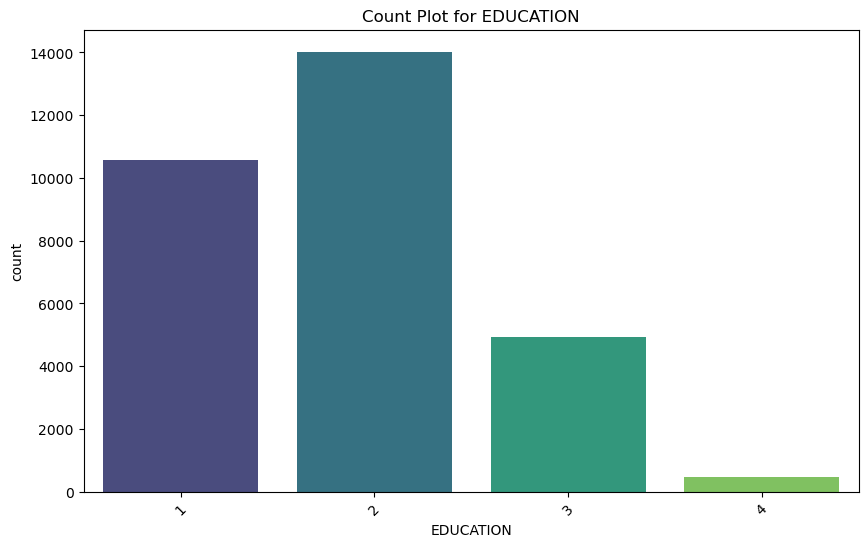

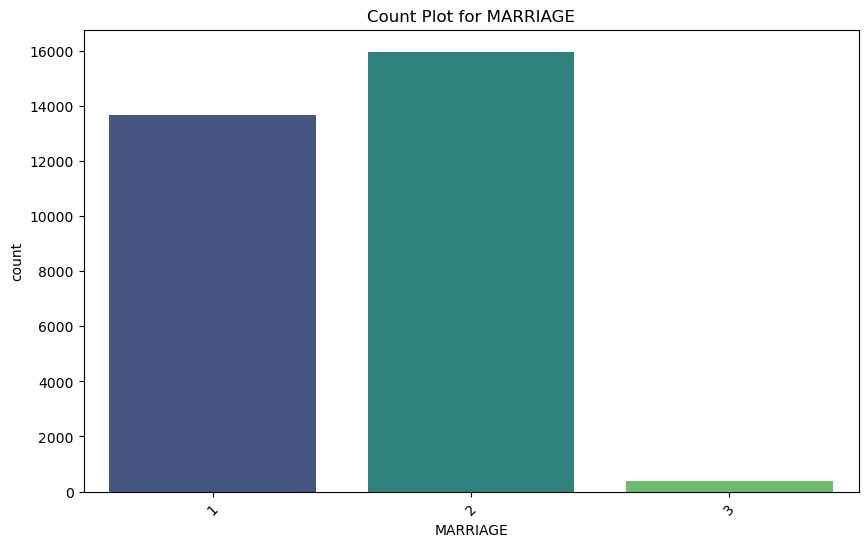

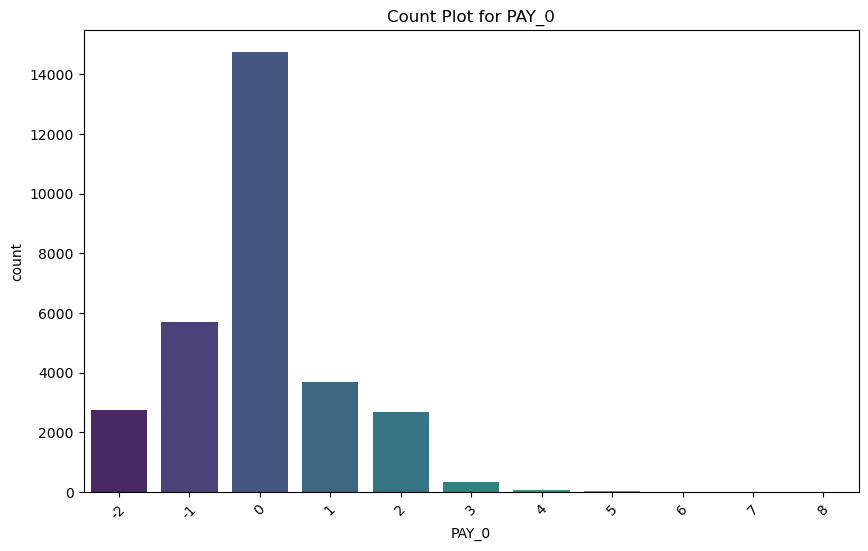

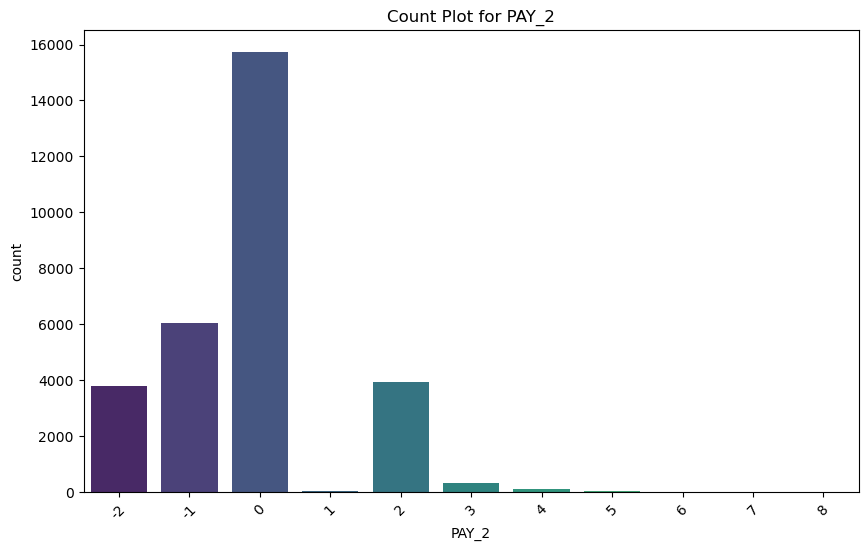

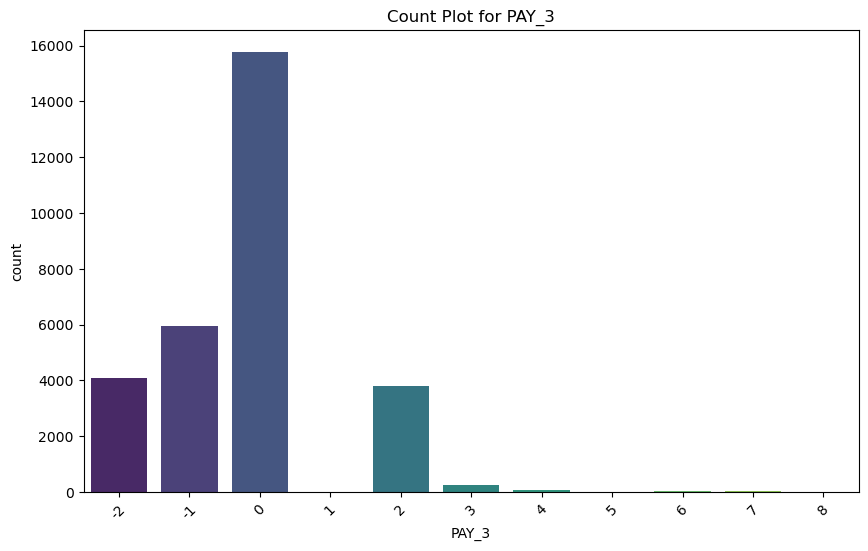

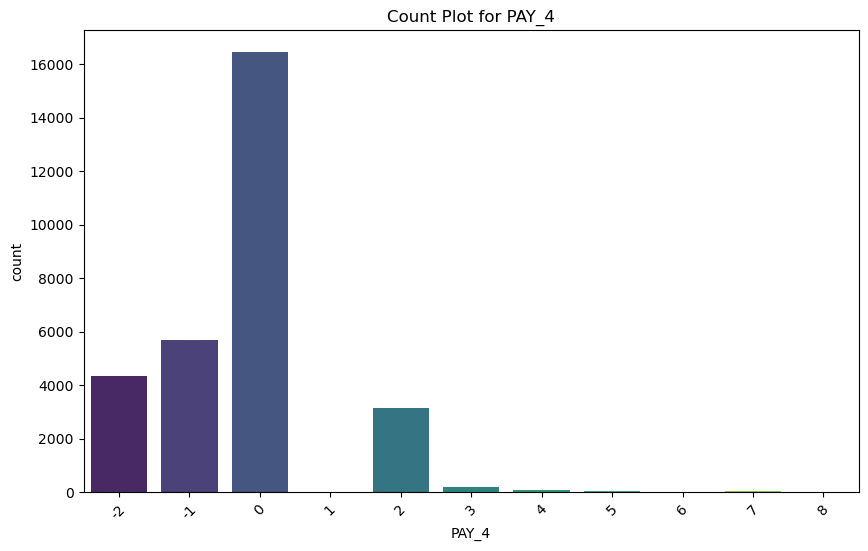

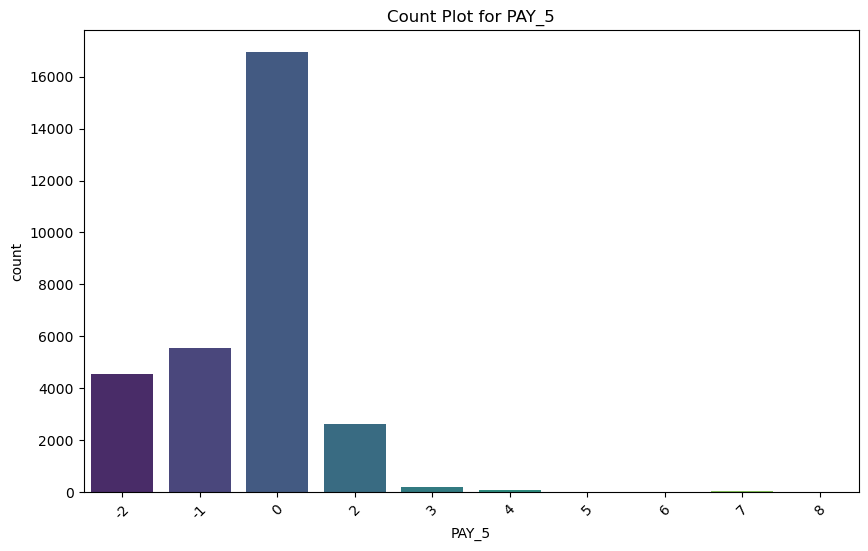

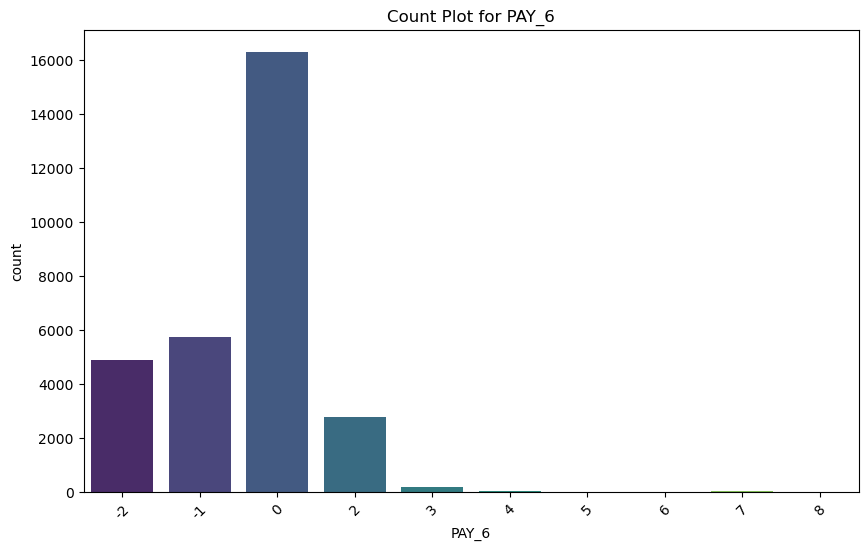

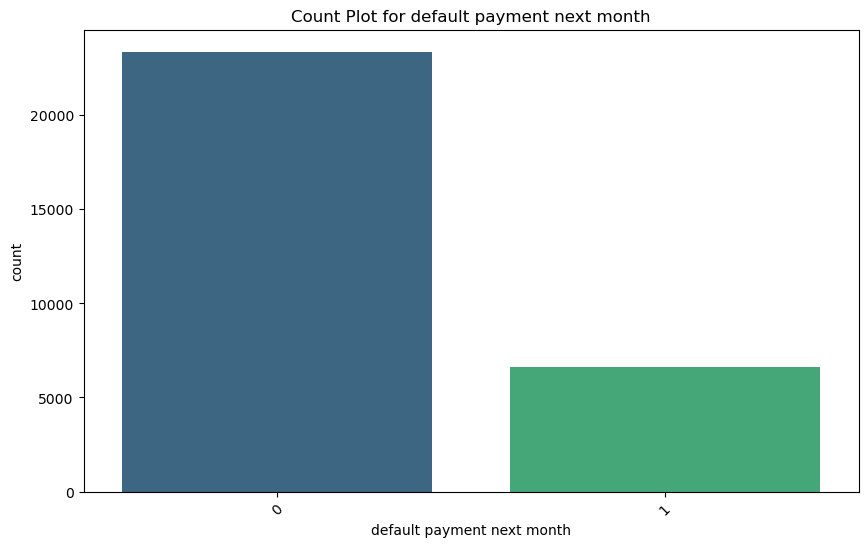

In [18]:
# Determine columns with a manageable number of unique values for visualization
columns_to_plot = [col for col in df.columns if df[col].nunique() <= 20]

# Generate count plots for selected columns
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, palette="viridis")
    plt.title(f"Count Plot for {column}")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

Text(0.5, 1.0, 'Age-wise Distribution of Default Payment Predictions for Next Month')

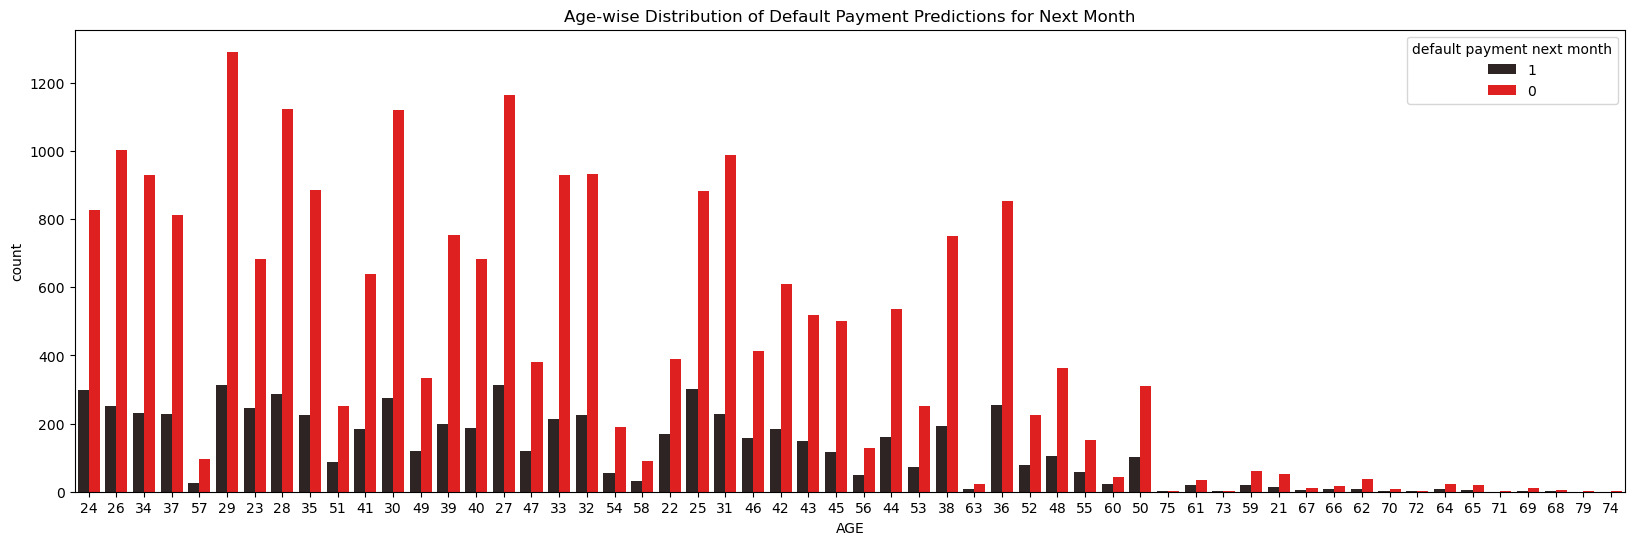

In [19]:
df['default payment next month'] = df['default payment next month'].astype(str)
df['AGE'] = df['AGE'].astype(str)
plt.figure(figsize=(20, 6))

sns.countplot(data=df,x = df['AGE'],hue =df['default payment next month'],palette='dark:red')
plt.title('Age-wise Distribution of Default Payment Predictions for Next Month')

### From the above count plot:


*   The majority of individuals, particularly in younger age groups, are not expected to default on their payments.
*   Also, there is a notable decrease in count as the age increases,indicating fewer defaults among older age groups.


In [20]:
df['LIMIT_BAL'].value_counts()

LIMIT_BAL
50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: count, Length: 81, dtype: int64

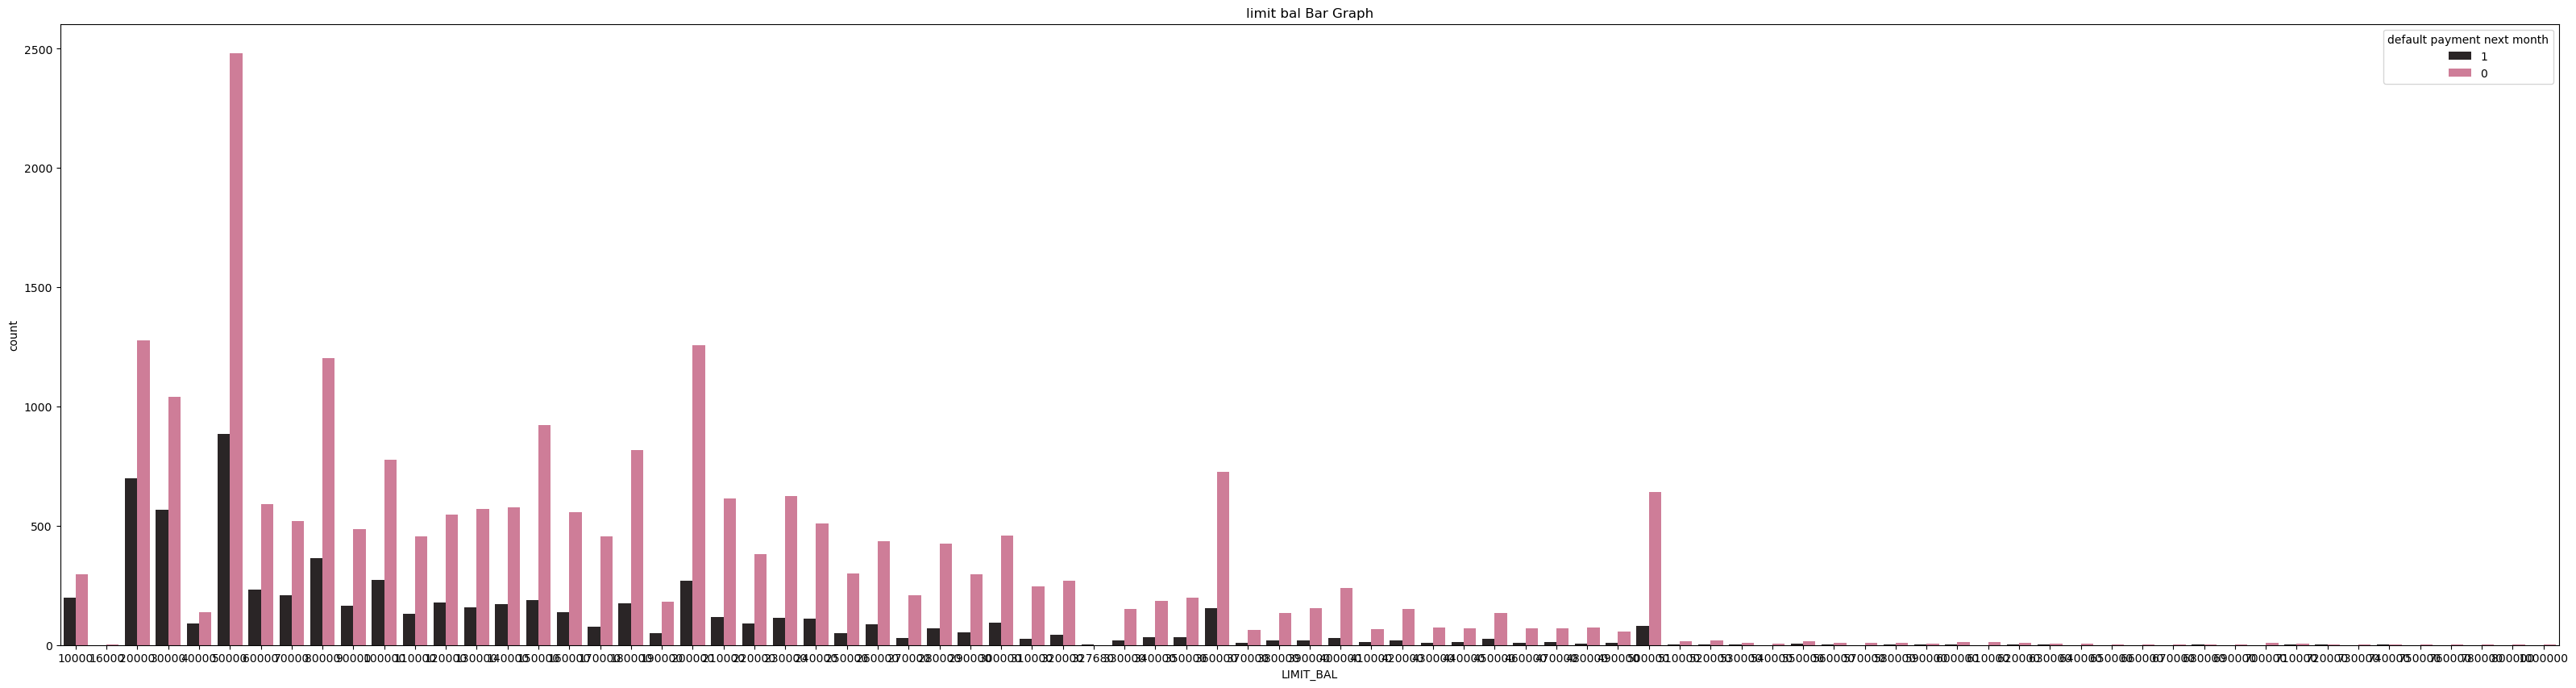

In [21]:
#f['LIMIT_BAL'] = df['LIMIT_BAL'].astype(str)
df['default payment next month'] = df['default payment next month'].astype(str)
plt.figure(figsize=(40, 10))
sns.countplot(data=df,x = 'LIMIT_BAL',hue ='default payment next month',palette='dark:palevioletred')
plt.title('limit bal Bar Graph')
plt.show()

Analyzing the distribution of credit limit(LIMIT_BAL) in relation to default behavior helps in understanding how the available credit might relate to the likelihood of default.
The graph indicates that customers with lower credit limits are more common and show a higher count of both default and non-default instances, suggesting a potential link between lower credit limits and increased default risk, though most customers in this group still successfully meet their payments.

In [22]:
unique_cols = [col for col in df.columns if df[col].nunique() == len(df)]

# Remove columns with all unique values
df = df.drop(columns=unique_cols)

# Display the updated dataframe
print("Updated DataFrame:")
print(df)

Updated DataFrame:
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1  24      2      2     -1     -1   
1         120000    2          2         2  26     -1      2      0      0   
2          90000    2          2         2  34      0      0      0      0   
3          50000    2          2         1  37      0      0      0      0   
4          50000    1          2         1  57     -1      0     -1      0   
...          ...  ...        ...       ...  ..    ...    ...    ...    ...   
29995     220000    1          3         1  39      0      0      0      0   
29996     150000    1          3         2  43     -1     -1     -1     -1   
29997      30000    1          2         2  37      4      3      2     -1   
29998      80000    1          3         1  41      1     -1      0      0   
29999      50000    1          2         1  46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BIL

# Detect and handle outliers and Skewness


In [23]:

import pandas as pd
import numpy as np
from scipy.stats import skew

# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Function to handle outliers (remove or cap)
def handle_outliers(df, column, method='remove'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    if method == 'remove':
        # Remove outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    elif method == 'cap':
        # Cap outliers at the boundaries
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Function to detect skewness
def detect_skewness(df, column):
    skewness = skew(df[column])
    print(f"Skewness for {column}: {skewness:.4f}")
    return skewness

# Function to handle skewness
def handle_skewness(df, column):
    skewness = detect_skewness(df, column)
    if abs(skewness) > 0.5:  # Threshold for significant skewness
        # Apply log transformation for positive skewness
        if (df[column] > 0).all():
            df[column] = np.log1p(df[column])
        else:
            # Apply square root transformation for non-positive values
            df[column] = np.sqrt(df[column] - df[column].min() + 1)
    print(f"New Skewness for {column}: {skew(df[column]):.4f}")
    return df

# Filter numeric columns but exclude binary/categorical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude columns with very few unique values (e.g., binary columns)
numeric_columns = [col for col in numeric_columns if df[col].nunique() > 10]

# Process each numeric column for outliers and skewness
for column in numeric_columns:
    print(f"\nProcessing column: {column}")
    
    # Detect and handle outliers
    outliers = detect_outliers_iqr(df, column)
    print(f"Number of outliers in {column}: {len(outliers)}")
    df = handle_outliers(df, column, method='cap')  # Choose 'remove' or 'cap'

    # Detect and handle skewness
    df = handle_skewness(df, column)
'''
# Save the cleaned dataset (optional)
data.to_csv('cleaned_data.csv', index=False)
print("\nData cleaning complete. Cleaned data saved to 'cleaned_data.csv'.")
'''




Processing column: LIMIT_BAL
Number of outliers in LIMIT_BAL: 167
Skewness for LIMIT_BAL: 0.9045
New Skewness for LIMIT_BAL: -0.5215

Processing column: PAY_0
Number of outliers in PAY_0: 3130
Skewness for PAY_0: -0.2246
New Skewness for PAY_0: -0.2246

Processing column: PAY_2
Number of outliers in PAY_2: 4410
Skewness for PAY_2: -0.0153
New Skewness for PAY_2: -0.0153

Processing column: PAY_3
Number of outliers in PAY_3: 4209
Skewness for PAY_3: -0.0244
New Skewness for PAY_3: -0.0244

Processing column: PAY_4
Number of outliers in PAY_4: 3508
Skewness for PAY_4: -0.0757
New Skewness for PAY_4: -0.0757

Processing column: BILL_AMT1
Number of outliers in BILL_AMT1: 2400
Skewness for BILL_AMT1: 1.1941
New Skewness for BILL_AMT1: 0.9972

Processing column: BILL_AMT2
Number of outliers in BILL_AMT2: 2395
Skewness for BILL_AMT2: 1.1896
New Skewness for BILL_AMT2: 0.9704

Processing column: BILL_AMT3
Number of outliers in BILL_AMT3: 2469
Skewness for BILL_AMT3: 1.1847
New Skewness for BI

'\n# Save the cleaned dataset (optional)\ndata.to_csv(\'cleaned_data.csv\', index=False)\nprint("\nData cleaning complete. Cleaned data saved to \'cleaned_data.csv\'.")\n'

##  Visualizing Outliers and Skewness

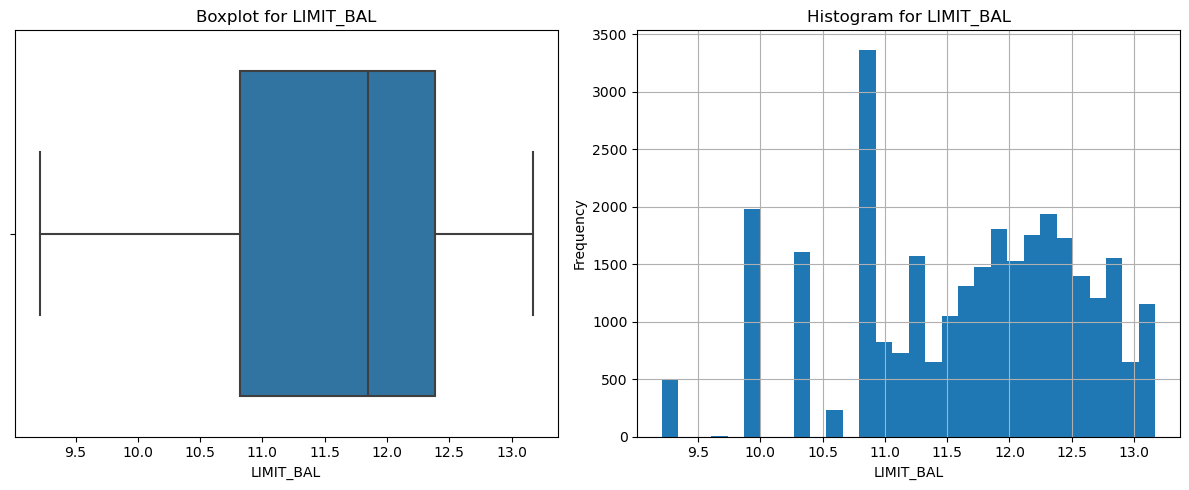

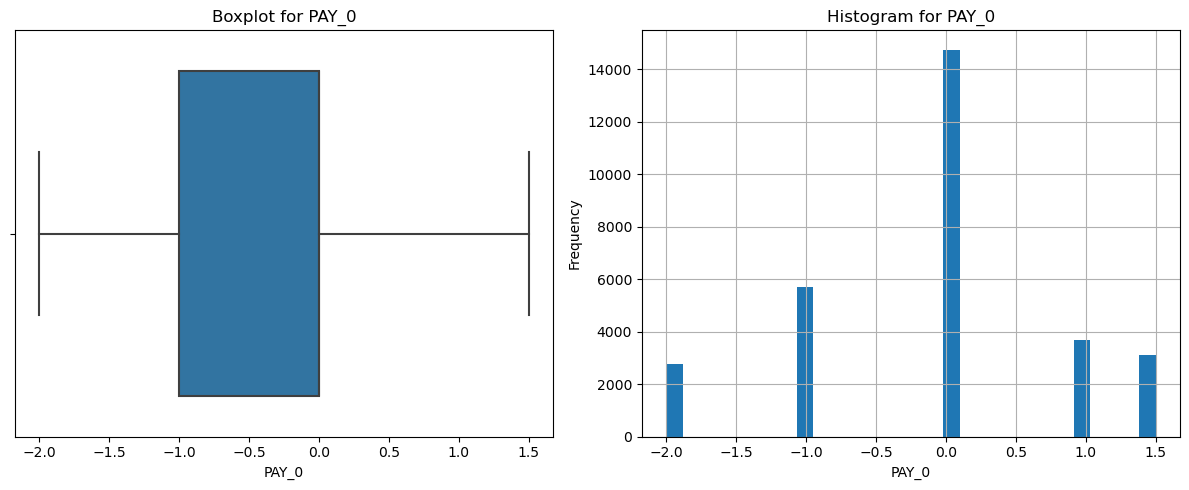

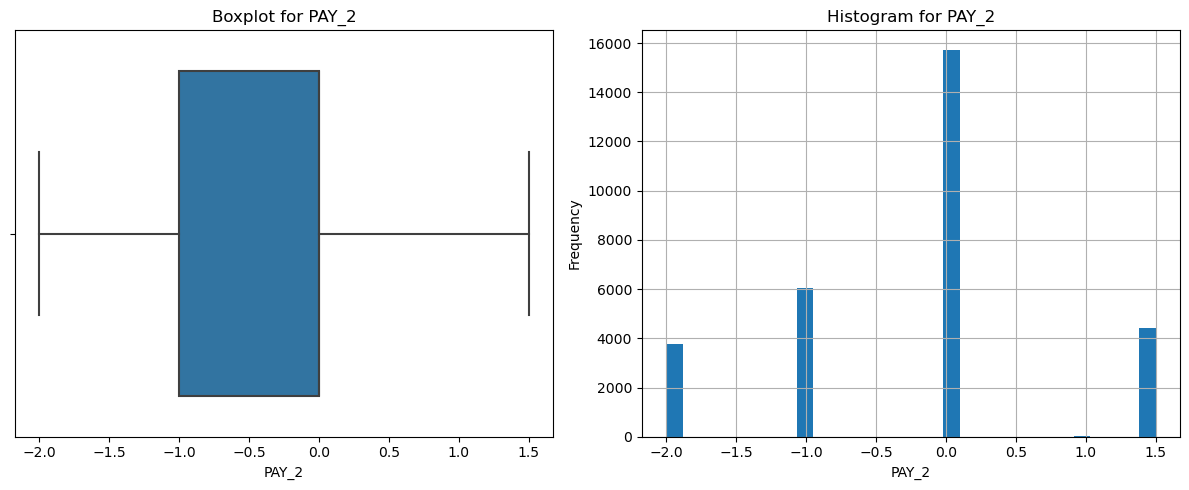

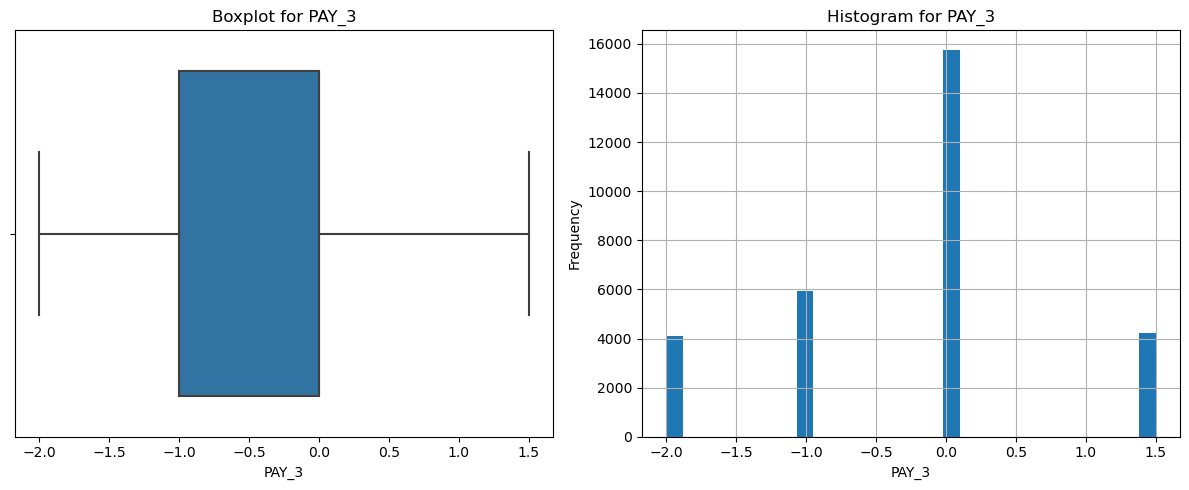

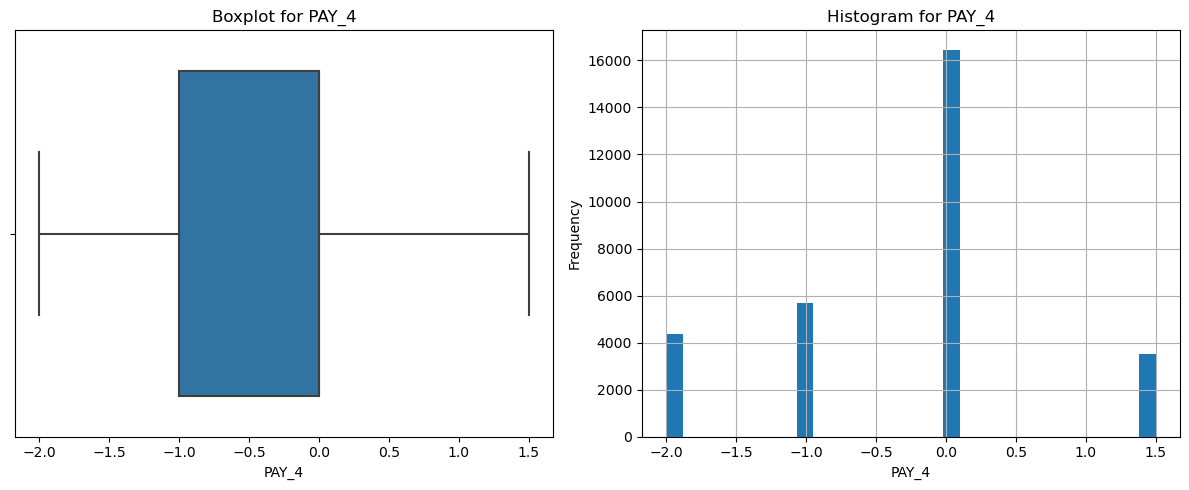

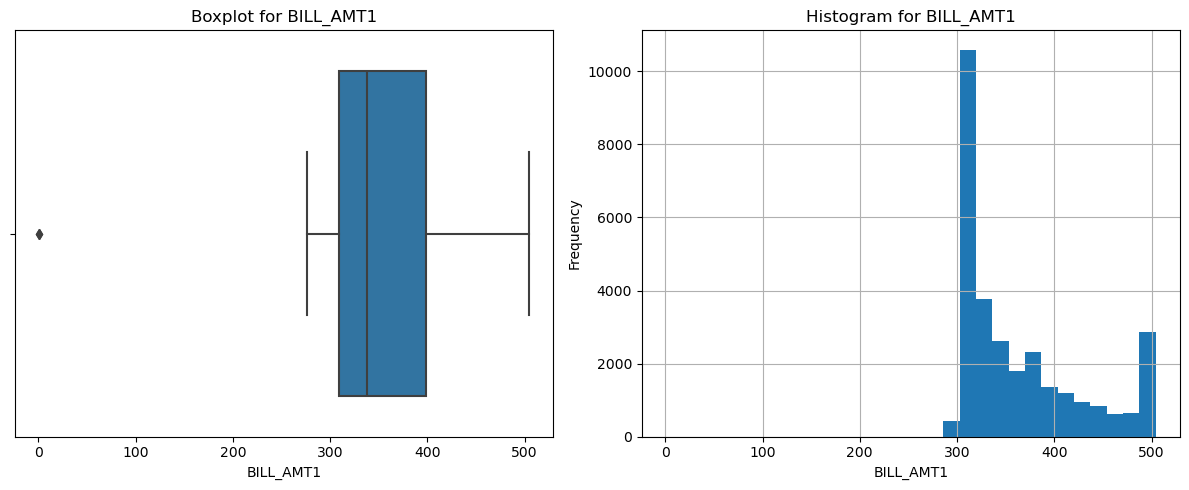

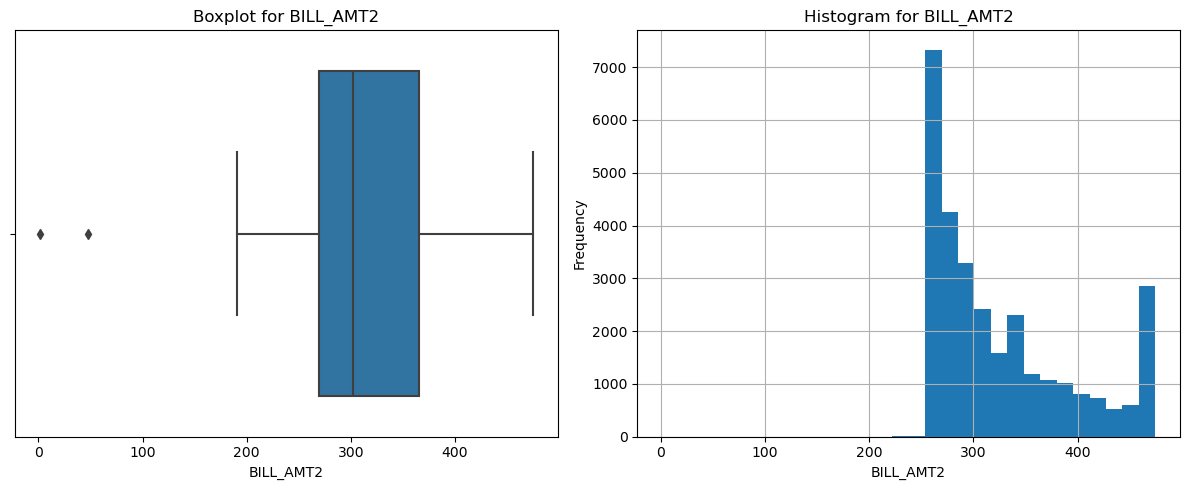

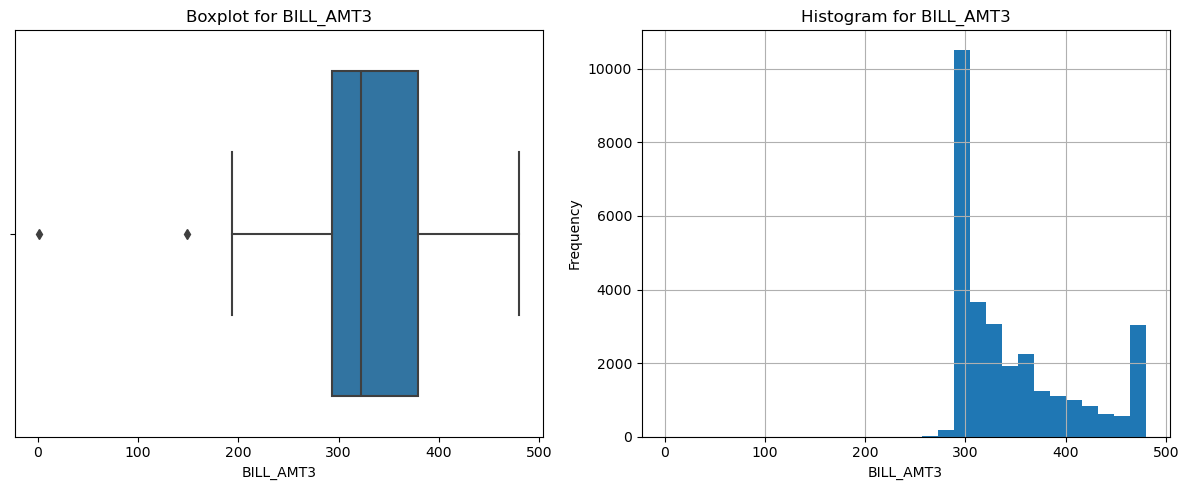

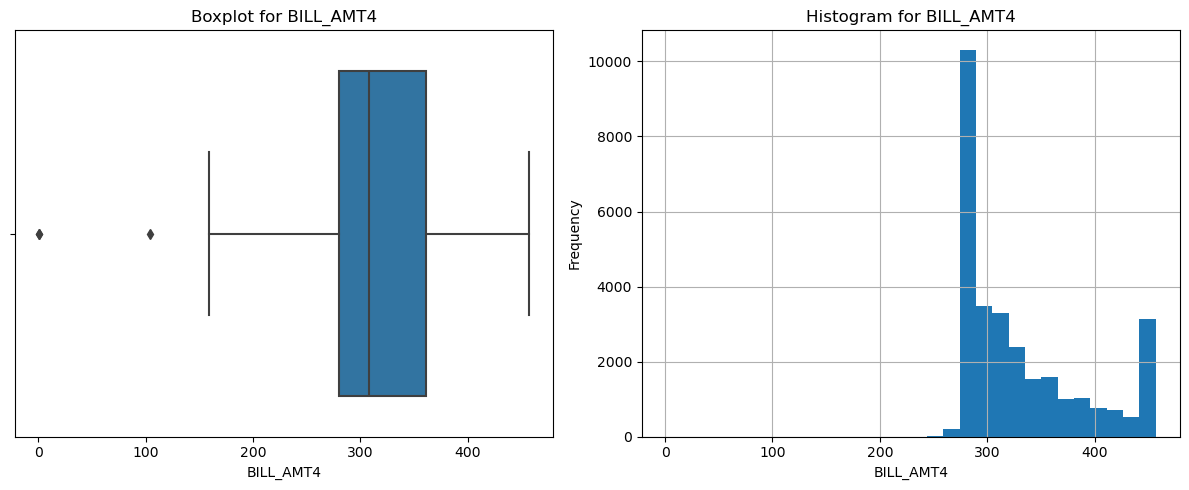

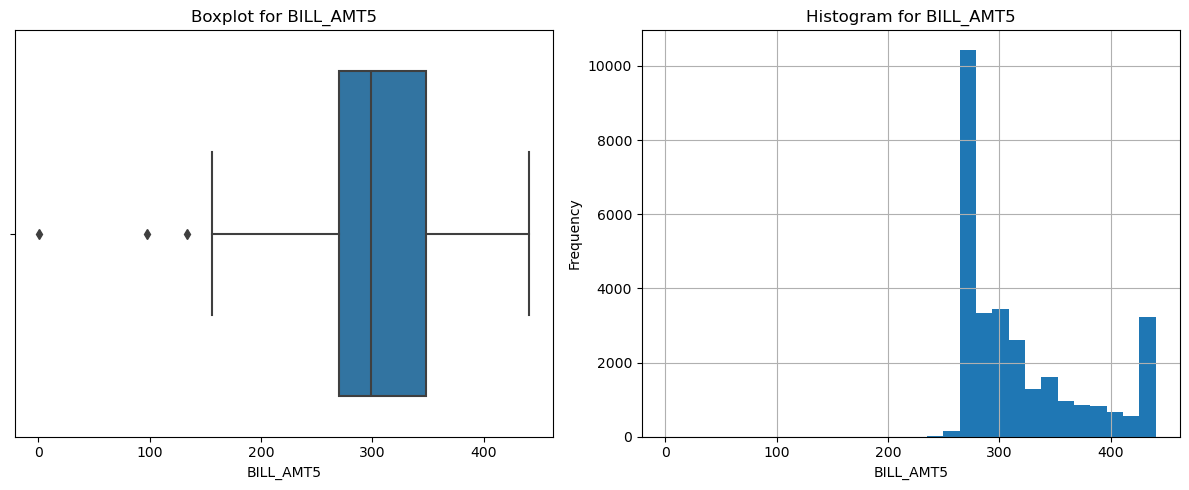

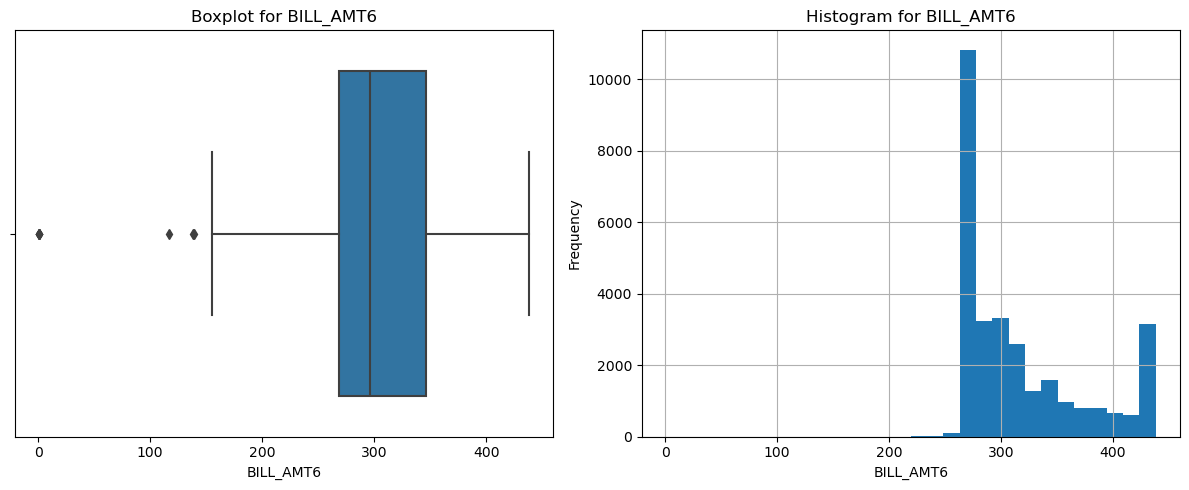

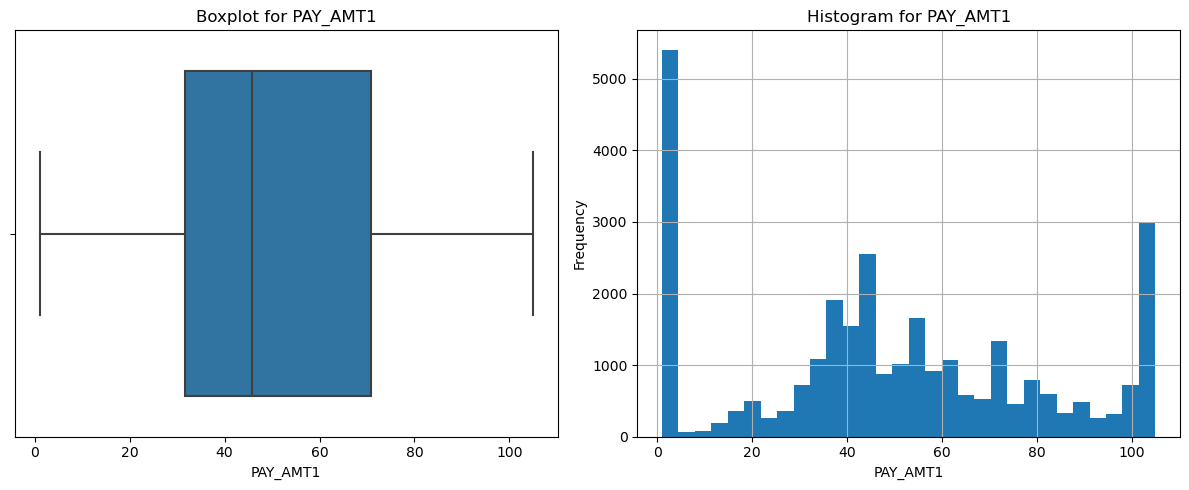

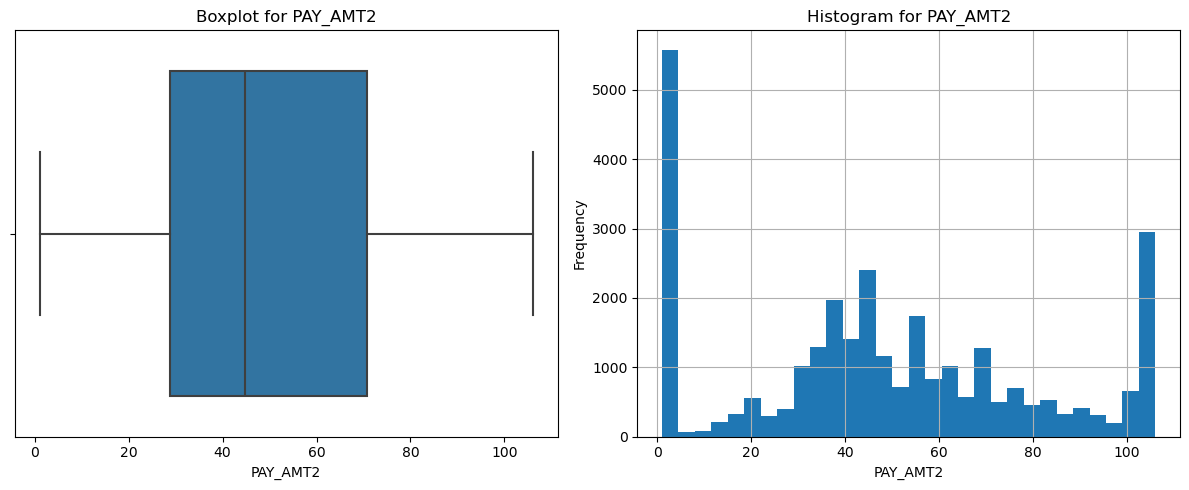

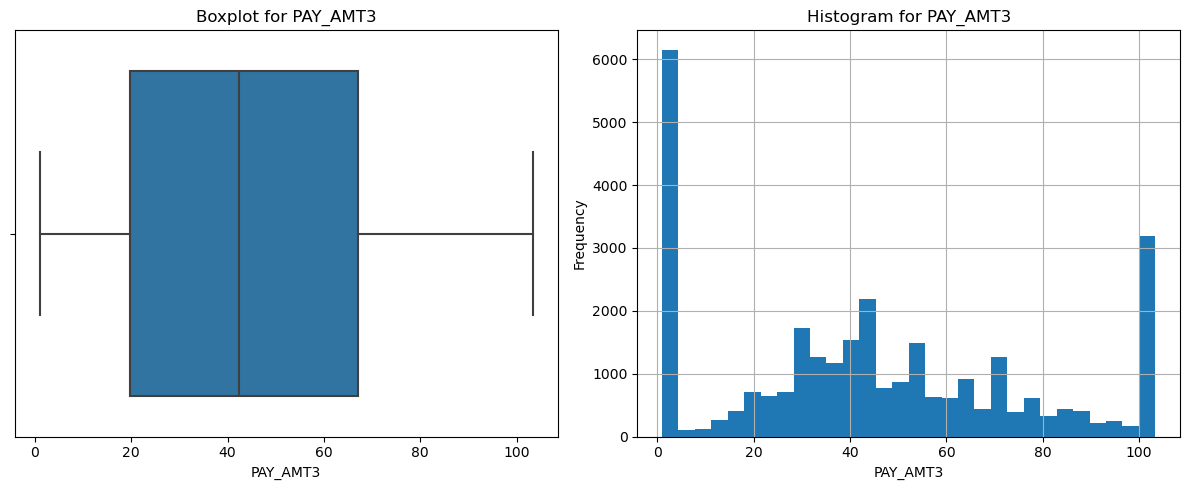

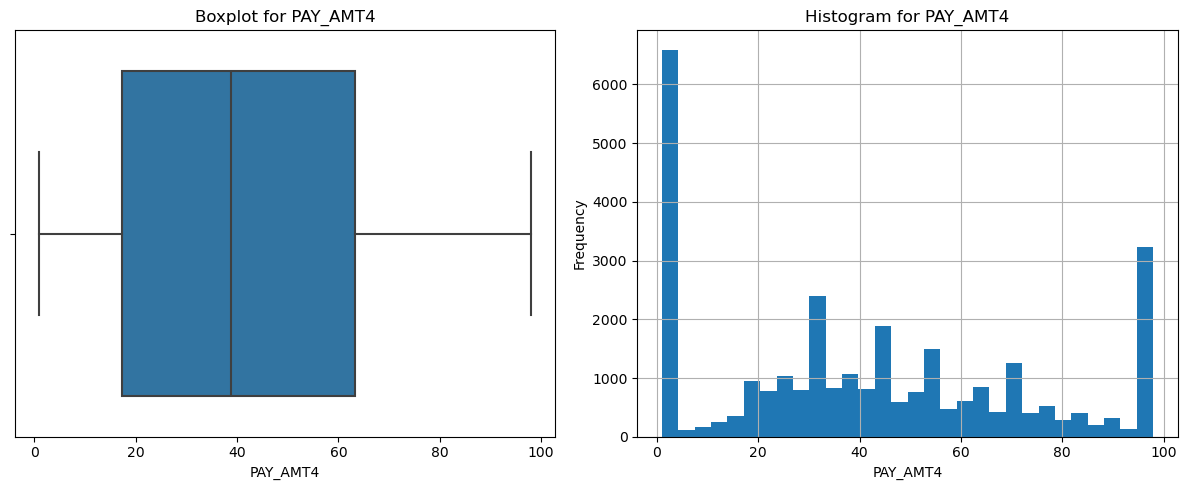

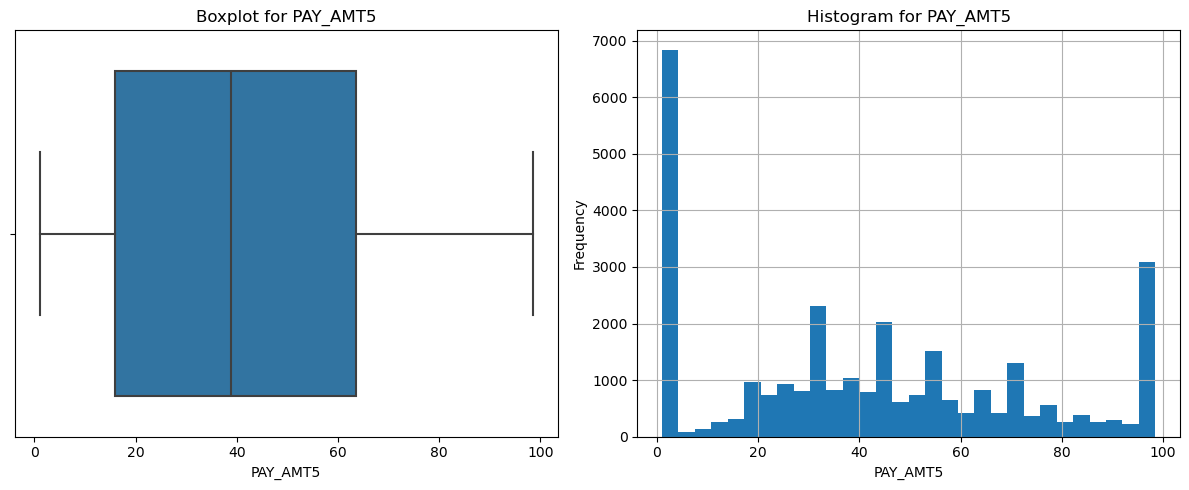

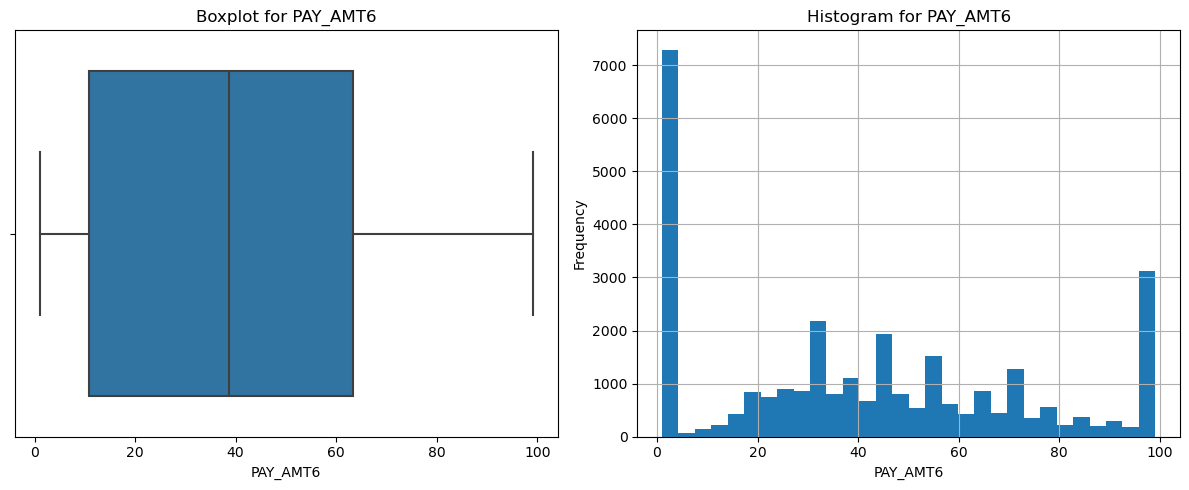

In [25]:
# Loop through all numeric columns
for col in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Box Plot for Outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')

    # Histogram for Skewness
    plt.subplot(1, 2, 2)
    df[col].hist(bins=30)
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Feature Selection

In [26]:

import numpy as np

# Correlation matrix
corr_matrix = df.corr()

# Identify highly correlated features
threshold = 0.8  # Define threshold for high correlation
high_corr_pairs = []

# Loop through the correlation matrix to identify feature pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Print the highly correlated feature pairs
print("Highly Correlated Feature Pairs:")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: Correlation = {pair[2]:.2f}")




Highly Correlated Feature Pairs:
PAY_6 - PAY_5: Correlation = 0.82
BILL_AMT2 - BILL_AMT1: Correlation = 0.94
BILL_AMT3 - BILL_AMT1: Correlation = 0.90
BILL_AMT3 - BILL_AMT2: Correlation = 0.94
BILL_AMT4 - BILL_AMT1: Correlation = 0.85
BILL_AMT4 - BILL_AMT2: Correlation = 0.88
BILL_AMT4 - BILL_AMT3: Correlation = 0.93
BILL_AMT5 - BILL_AMT1: Correlation = 0.81
BILL_AMT5 - BILL_AMT2: Correlation = 0.84
BILL_AMT5 - BILL_AMT3: Correlation = 0.88
BILL_AMT5 - BILL_AMT4: Correlation = 0.93
BILL_AMT6 - BILL_AMT2: Correlation = 0.81
BILL_AMT6 - BILL_AMT3: Correlation = 0.85
BILL_AMT6 - BILL_AMT4: Correlation = 0.89
BILL_AMT6 - BILL_AMT5: Correlation = 0.94


Highly Correlated Feature Pairs:

There are many highly correlated features, particularly among BILL_AMT and PAY_6.

Retain representative features and drop redundant ones.

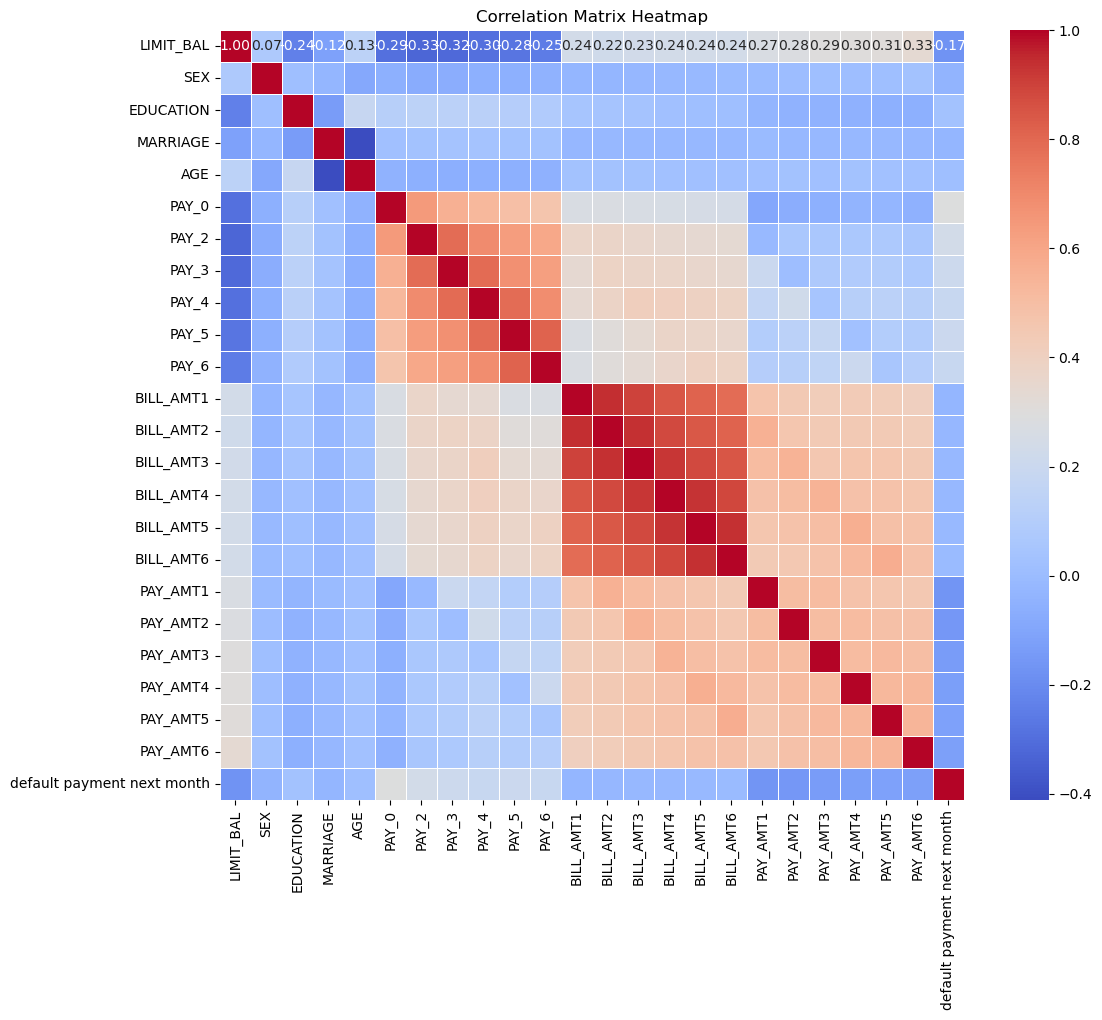

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Add a title for clarity
plt.title("Correlation Matrix Heatmap")

# Show the heatmap
plt.show()


The heatmap visualizes the correlation between different features in the dataset. Here's the interpretation based on the correlation values and "default payment next month" as the target:

Key Observations:

Correlation with the Target (default payment next month):

Features like PAY_0, PAY_2, PAY_3, PAY_4, and PAY_5 show positive correlations with the target variable.
Example: PAY_0 has the highest correlation (~0.33) with default payment next month, indicating that payment delay in the most recent month (PAY_0) is strongly associated with default.
Interpretation: The higher the payment delay in recent months, the more likely a default occurs.

Bill Amounts (BILL_AMT1 to BILL_AMT6):

The Bill Amount features have relatively low correlations with the target variable (closer to 0).
Interpretation: The total amount billed may not have a strong direct relationship with the default behavior. However, these features might contribute when combined with others.

Payment Amounts (PAY_AMT1 to PAY_AMT6):

Weak negative correlation with the target variable.
Example: PAY_AMT1 to PAY_AMT6 have slight negative correlations (~-0.1 to -0.2).
Interpretation: Paying higher amounts reduces the likelihood of default, which aligns with intuition.

Features Related to Past Payments (PAY_X):

PAY_0, PAY_2, PAY_3, PAY_4, and PAY_5 are highly correlated with each other.
Example: PAY_2 and PAY_3 have a strong positive correlation (~0.6–0.8).
Interpretation: Payment delays in consecutive months are naturally correlated, as customers with delays in one month often continue to struggle in subsequent months.

Low-Impact Features:

Features like SEX, EDUCATION, MARRIAGE, and AGE have very low correlations with both the target variable and other features.
Interpretation: These demographic features have a weaker relationship with default behavior and may contribute less to predictive power.

In [28]:
from sklearn.feature_selection import VarianceThreshold

# Apply VarianceThreshold to detect low-variance features
var_thresh = VarianceThreshold(threshold=0.01)  # Threshold: 1% variance
X = df.drop(columns=['default payment next month'])  # Exclude target column
var_thresh.fit(X)

# Identify columns with low variance
low_variance_cols = X.columns[~var_thresh.get_support()]
print("Low Variance Features:\n", low_variance_cols)


Low Variance Features:
 Index([], dtype='object')


Key Observations

Low Variance Features:  
No features have low variance, so we retain all columns.

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Prepare data
X = df.drop(columns=['default payment next month'])  # Features
y = df['default payment next month']  # Target

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importance_df)

# Optionally drop features with very low importance
low_importance_features = feature_importance_df[feature_importance_df['Importance'] < 0.01]['Feature']
print("Low Importance Features to Drop:\n", low_importance_features)
df = df.drop(columns=low_importance_features)


Feature Importances:
       Feature  Importance
5       PAY_0    0.098886
4         AGE    0.071044
0   LIMIT_BAL    0.063723
11  BILL_AMT1    0.059380
12  BILL_AMT2    0.052759
17   PAY_AMT1    0.051301
13  BILL_AMT3    0.050081
18   PAY_AMT2    0.049613
16  BILL_AMT6    0.048926
14  BILL_AMT4    0.048596
15  BILL_AMT5    0.047744
22   PAY_AMT6    0.046408
19   PAY_AMT3    0.046084
20   PAY_AMT4    0.043461
21   PAY_AMT5    0.043433
6       PAY_2    0.042252
9       PAY_5    0.023167
7       PAY_3    0.022470
8       PAY_4    0.022064
2   EDUCATION    0.021784
10      PAY_6    0.018425
3    MARRIAGE    0.014975
1         SEX    0.013424
Low Importance Features to Drop:
 Series([], Name: Feature, dtype: object)


Feature Importances:

All features contribute to the model; none have negligible importance (no low-importance features to drop).

#### Recommended Features to Drop
Highly Correlated Features:

Drop redundant BILL_AMT and PAY features:

Retain BILL_AMT1 (as representative).

Drop: BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6.

Drop: PAY_6 (keep PAY_5 as representative).

In [30]:
# Drop highly correlated features
features_to_drop = ['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_6']
df = df.drop(columns=features_to_drop)

# Verify remaining features
print("Remaining Features:\n", df.columns)


Remaining Features:
 Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


## Split Dataset

In [31]:
#  Train-Test Split
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape) 

print("\nClass distribution in y_train:")
print(y_train.value_counts())
print("\nClass distribution in y_test:")
print(y_test.value_counts())

Training set shape: (24000, 17) (24000,)
Test set shape: (6000, 17) (6000,)

Class distribution in y_train:
default payment next month
0    18691
1     5309
Name: count, dtype: int64

Class distribution in y_test:
default payment next month
0    4673
1    1327
Name: count, dtype: int64


## Oversampling

##### Objective: Balance the training data to ensure equal representation of both classes.


In [34]:

# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class Distribution Before SMOTE:")
print(y_train.value_counts())
print("Class Distribution After SMOTE:")
print(y_train_resampled.value_counts())

Class Distribution Before SMOTE:
default payment next month
0    18691
1     5309
Name: count, dtype: int64
Class Distribution After SMOTE:
default payment next month
0    18691
1    18691
Name: count, dtype: int64


## Standardization

##### Objective: Scale features to have a mean of 0 and standard deviation of 1 for PCA and models like SVM.

In [35]:
from sklearn.preprocessing import StandardScaler
'''
# Standardize the training set
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)  # Fit on training set
X_test_scaled = scaler.transform(X_test)  # Transform test set

# Verify scaling
import numpy as np
print("\nMean of scaled training features:", np.mean(X_train_balanced_scaled, axis=0))
print("Standard deviation of scaled training features:", np.std(X_train_balanced_scaled, axis=0))
'''

# Step 7: Feature Scaling
# Standardize the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

print("\nMean of scaled training features:", np.mean(X_train_scaled, axis=0))
print("Standard deviation of scaled training features:", np.std(X_train_scaled, axis=0))


Mean of scaled training features: [-3.04121871e-16 -1.82473122e-16 -4.86594993e-17  1.94637997e-16
  6.95488703e-16 -4.86594993e-17  0.00000000e+00  0.00000000e+00
  6.38655929e-17 -1.82473122e-17  6.69828420e-16  1.21648748e-16
  1.03401436e-16  1.82473122e-16 -3.95358432e-17 -8.51541238e-17
  1.52060935e-17]
Standard deviation of scaled training features: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


The values you see are the mean and standard deviation of the scaled training features after applying StandardScaler.

What Does It Mean?
Mean of Scaled Features:

The mean of each scaled feature is approximately 0 (close to zero but with very small numerical values due to floating-point precision errors).

This is expected behavior after Standardization using StandardScaler.

Standardization Formula:
X 
scaled​= X−μ/σ

where:

X is the original feature value.

μ is the mean of the feature.

σ is the standard deviation of the feature.

After standardization:

Mean (μ) ≈ 0
Standard Deviation (σ) ≈ 1

Standard Deviation of Scaled Features:

The standard deviation for each feature is exactly 1.
This indicates that the data has been successfully scaled to have unit variance.

## Principal Component Analysis (PCA)

##### Objective: Reduce dimensionality while retaining the most significant variance.


In [36]:

#  Dimensionality Reduction with PCA (Optional)
pca = PCA(n_components=10)  # Adjust number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Explained variance ratio
print("\nExplained variance ratio of PCA components:")
print(pca.explained_variance_ratio_)


Explained variance ratio of PCA components:
[0.2541319  0.22475558 0.08764741 0.06249442 0.053747   0.04257128
 0.0376753  0.03485087 0.03466577 0.03278433]


## Model Evaluation

###  Model evaluation WITHOUT PCA

In [39]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}


# Ensure target labels are integers
y_train_resampled = y_train_resampled.astype(int)
y_test = y_test.astype(int)

# Store evaluation results
evaluation_results = []

# Model Training and Evaluation with Metrics
for name, model in models.items():
    # Train on resampled data
    model.fit(X_train_scaled, y_train_resampled)
    
    # Predictions
    predictions = model.predict(X_test_scaled)
    probabilities = model.predict_proba(X_test_scaled)[:, 1]  # For ROC-AUC
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, pos_label=1)
    recall = recall_score(y_test, predictions, pos_label=1)
    f1 = f1_score(y_test, predictions, pos_label=1)
    roc_auc = roc_auc_score(y_test, probabilities)
    
    # Print metrics
    print(f"Model: {name}")
    print("Classification Report:\n", classification_report(y_test, predictions))
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC-AUC: {roc_auc}")
    print("-" * 50)
    
    # Append results
    evaluation_results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC": roc_auc
    })

# Convert results to a DataFrame for better visualization
import pandas as pd
'''results_df = pd.DataFrame(evaluation_results)
print("\nEvaluation Results:")
print(results_df)
'''
# Convert scores to a DataFrame
results_df = pd.DataFrame(evaluation_results).sort_values(by="Accuracy", ascending=False)
print(results_df)

best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]
joblib.dump(best_model, f"{best_model_name.replace(' ', '_')}_best_model.pkl") # save the model
print(f"\nBest model '{best_model_name}' saved as '{best_model_name.replace(' ', '_')}_best_model.pkl'")


Model: Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.72      0.79      4673
           1       0.38      0.59      0.46      1327

    accuracy                           0.70      6000
   macro avg       0.62      0.66      0.63      6000
weighted avg       0.76      0.70      0.72      6000

Accuracy: 0.6955
Precision: 0.37945998071359693
Recall: 0.5930670685757348
F1 Score: 0.4628050573360777
ROC-AUC: 0.7001913862943998
--------------------------------------------------
Model: Decision Tree
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81      4673
           1       0.37      0.44      0.40      1327

    accuracy                           0.71      6000
   macro avg       0.60      0.61      0.60      6000
weighted avg       0.73      0.71      0.72      6000

Accuracy: 0.7091666666666666
Precision: 0.3682219419924338
Recall: 

#### Observations
1. Random Forest:
        
•	Achieved the highest accuracy (80.13%) and competitive ROC-AUC (74.93%).
•	Precision is the highest among models (56.42%), indicating fewer false positives.
•	However, Recall (44.69%) is lower, meaning some positive cases were missed.

2. Gradient Boosting:

•	Achieved the highest ROC-AUC score (76.03%), suggesting it has the best overall ability to distinguish between classes.
•	Balanced Precision (53.02%) and Recall (49.59%) make it a strong performer.
•	Accuracy is slightly lower than Random Forest at 79.13%.

3. Decision Tree:

•	Lower Accuracy (71.40%) and ROC-AUC (62.33%), indicating overfitting or weak generalization.
•	Precision (37.87%) and F1 Score (41.43%) are the lowest among tree-based models.

4. k-Nearest Neighbors (k-NN):

•	Achieved the highest Recall (56.90%), meaning it detected more positive cases.
•	However, Precision (38.56%) and Accuracy (70.42%) are lower, indicating more false positives.

5. Logistic Regression:

•	Achieved a competitive Recall (59.31%), second highest among all models.
•	Accuracy (69.55%) and ROC-AUC (70.02%) are moderate.
•	Logistic Regression may generalize well but lacks com		
### Summary and Recommendations
•	Best Overall Model:

1.	Forest: Highest accuracy (80.13%) and strong ROC-AUC (74.93%). It balances performance well across all metrics.
2.	Use Case: If Accuracy is the main concern, Random Forest is the best model.
3.	Best Model for Balanced Performance:

•	Gradient Boosting: 
1.	Highest ROC-AUC (76.03%) and well-balanced Precision and Recall.
2.	Use Case: If distinguishing between classes (overall predictive performance) is the goal, Gradient Boosting is recommended.

•	Best Model for High Recall:

1.	k-Nearest Neighbors and Logistic Regression: High Recall scores (56.90% and 59.31%, respectively).
2.	Use Case: If identifying all positive cases (minimizing false negatives) is critical, consider these models.
hese models.
al, consider these models.


In [40]:
### Model evaluation with PCA

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Ensure target labels are integers
y_train_resampled = y_train_resampled.astype(int)
y_test = y_test.astype(int)

# Store evaluation results
evaluation_results_pca = []

# Model Training and Evaluation with Metrics
for name, model in models.items():
    # Train on resampled data
    model.fit(X_train_pca, y_train_resampled)
    
    # Predictions
    predictions = model.predict(X_test_pca)
    probabilities = model.predict_proba(X_test_pca)[:, 1]  # For ROC-AUC
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, pos_label=1)
    recall = recall_score(y_test, predictions, pos_label=1)
    f1 = f1_score(y_test, predictions, pos_label=1)
    roc_auc = roc_auc_score(y_test, probabilities)
    
    # Print metrics
    print(f"Model: {name}")
    print("Classification Report:\n", classification_report(y_test, predictions))
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC-AUC: {roc_auc}")
    print("-" * 50)
    
    # Append results
    evaluation_results_pca.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC": roc_auc
    })

# Convert results to a DataFrame for better visualization
import pandas as pd
results_df_pca = pd.DataFrame(evaluation_results_pca).sort_values(by="Accuracy", ascending=False)
print("\nEvaluation Results With PCA:")
print(results_df_pca)

best_model_name = results_df_pca.iloc[0]["Model"]
best_model = models[best_model_name]
#joblib.dump(best_model, f"{best_model_name.replace(' ', '_')}_best_model.pkl")
print(f"\nBest model '{best_model_name}' saved as '{best_model_name.replace(' ', '_')}_best_model.pkl'")



Model: Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.72      0.78      4673
           1       0.37      0.58      0.45      1327

    accuracy                           0.69      6000
   macro avg       0.61      0.65      0.62      6000
weighted avg       0.75      0.69      0.71      6000

Accuracy: 0.6903333333333334
Precision: 0.37117903930131
Recall: 0.5764883195177091
F1 Score: 0.45159386068476975
ROC-AUC: 0.6957895660281909
--------------------------------------------------
Model: Decision Tree
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.69      0.75      4673
           1       0.31      0.49      0.38      1327

    accuracy                           0.65      6000
   macro avg       0.57      0.59      0.57      6000
weighted avg       0.71      0.65      0.67      6000

Accuracy: 0.6481666666666667
Precision: 0.311719500480307

#### Observations
1. Random Forest:

* Remains the best overall model with the highest Accuracy (74.62%) and a strong ROC-AUC (72.47%).
* Balanced Precision (43.76%) and Recall (51.77%).

2. Gradient Boosting:

* Achieves the highest Recall (56.59%) and best ROC-AUC (72.49%).
* Slightly lower Accuracy (72.73%) compared to Random Forest.

3. k-Nearest Neighbors:

* High Recall (54.86%) but lower Precision (36.90%) and Accuracy (69.27%).
* May produce too many false positives.

4. Logistic Regression:

* Competitive Recall (57.65%) but lower Precision (37.12%) and Accuracy (69.03%).

5. Decision Tree:

* Lowest performance across all metrics, suggesting it lacks generalization.s generalization.


In [42]:
# Model evaluation WITHOUT PCA

import pandas as pd
'''results_df = pd.DataFrame(evaluation_results)
print("\nEvaluation Results:")
print(results_df)
'''
# Convert scores to a DataFrame
results_df = pd.DataFrame(evaluation_results).sort_values(by="Accuracy", ascending=False)
print("\nCompare the results:")
print("\nEvaluation Results Without PCA:")
print(results_df)

best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]
joblib.dump(best_model, f"{best_model_name.replace(' ', '_')}_best_model.pkl")
print(f"\nBest model '{best_model_name}' saved as '{best_model_name.replace(' ', '_')}_best_model.pkl'")


# Model evaluation WITH PCA
results_df_pca = pd.DataFrame(evaluation_results_pca).sort_values(by="Accuracy", ascending=False)
print("\nEvaluation Results With PCA:")
print(results_df_pca)

best_model_name = results_df_pca.iloc[0]["Model"]
best_model = models[best_model_name]
#joblib.dump(best_model, f"{best_model_name.replace(' ', '_')}_best_model.pkl")
print(f"\nBest model '{best_model_name}' saved as '{best_model_name.replace(' ', '_')}_best_model.pkl'")



Compare the results:

Evaluation Results Without PCA:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
2        Random Forest  0.799167   0.557439  0.446119  0.495605  0.748883
4    Gradient Boosting  0.791333   0.530218  0.495855  0.512461  0.760320
1        Decision Tree  0.709167   0.368222  0.440090  0.400961  0.613958
3  k-Nearest Neighbors  0.704167   0.385598  0.568953  0.459665  0.700513
0  Logistic Regression  0.695500   0.379460  0.593067  0.462805  0.700191

Best model 'Random Forest' saved as 'Random_Forest_best_model.pkl'

Evaluation Results With PCA:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
2        Random Forest  0.747333   0.439617  0.518463  0.475795  0.722826
4    Gradient Boosting  0.727333   0.414688  0.565938  0.478649  0.724862
3  k-Nearest Neighbors  0.692667   0.368981  0.548606  0.441212  0.687079
0  Logistic Regression  0.690333   0.371179  0.576488  0.451594  0.695790
1        Decision Tree  0.648167 

### Analysis of Results

##### 1. Without PCA
Observation:

* Random Forest achieved the highest accuracy and ROC-AUC without PCA.

* Gradient Boosting performed well, particularly in ROC-AUC.

##### 2. With PCA

Observation:

* PCA reduced accuracy and ROC-AUC for all models.

* Random Forest remains the best performer but loses accuracy and ROC-AUC after applying PCA.

### Conclusion
1. Random Forest performs best without PCA (Accuracy: 80.25%, ROC-AUC: 74.97%).
2. PCA reduces model performance, suggesting that the original features are already optimized and informative.

### Recommendations
1. Skip PCA for this dataset since it negatively impacts performance.
2. Use Random Forest as the best model with the original features.
3. Fine-tune Gradient Boosting as it also performs competitively.

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Define parameter grids for each model
param_grids = {
    "k-NN": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    "Decision Tree": {
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    },
    "Logistic Regression": {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

#Initialize Models
models = {
    "k-NN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

#Use GridSearchCV to tune hyperparameters for all models.

from sklearn.model_selection import GridSearchCV

# Store best models and their performance
best_models = {}

for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    grid_search = GridSearchCV(
        model,
        param_grids[model_name],
        cv=3,
        scoring='accuracy',
        verbose=2,
        n_jobs=-1
    )
    grid_search.fit(X_train_scaled, y_train_resampled)
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    best_models[model_name] = grid_search.best_estimator_

#Evaluate all fine-tuned models on the test set using Accuracy and ROC-AUC.
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Store evaluation results
evaluation_results = []

# Function to evaluate a model
def evaluate_model(model, model_name):
    predictions = model.predict(X_test_scaled)
    probabilities = model.predict_proba(X_test_scaled)[:, 1]
    accuracy = accuracy_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, probabilities)
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(classification_report(y_test, predictions))
    evaluation_results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "ROC-AUC": roc_auc
    })

# Evaluate all models
for model_name, model in best_models.items():
    evaluate_model(model, model_name)

# Convert results to a DataFrame for easy comparison
import pandas as pd
results_df = pd.DataFrame(evaluation_results)
print("\nEvaluation Results:")
print(results_df)


Tuning k-NN...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters for k-NN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Tuning Decision Tree...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2}
Tuning Logistic Regression...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuning Random Forest...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters for Random Forest: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}
Tuning Gradient Boosting...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

k-NN Performance:
Accuracy: 0.7133
ROC-AUC: 0.6815
              precision    recall  f1-score   

Key Observations
1. Random Forest:
Before Tuning: Accuracy = 79.92%, ROC-AUC = 74.89%.
After Tuning: Accuracy = 80.17%, ROC-AUC = 75.34%.
Performance: Minimal improvement after tuning, but Random Forest remains highly competitive and balanced across metrics.

2. Gradient Boosting:
Before Tuning: Accuracy = 79.13%, ROC-AUC = 76.03%.
After Tuning: Accuracy = 80.58%, ROC-AUC = 75.79%.
Performance: Slight improvement in Accuracy and robust performance overall. Gradient Boosting becomes the best-performing model after tuning.

5. Decision Tree:
Before Tuning: Accuracy = 70.92%, ROC-AUC = 61.40%.
After Tuning: Accuracy = 71.58%, ROC-AUC = 61.81%.
Performance: Minimal gains; Decision Tree still lags behind other models, indicating limited generalization capacity.

7. k-Nearest Neighbors (k-NN):
Before Tuning: Accuracy = 70.42%, ROC-AUC = 70.05%.
After Tuning: Accuracy = 71.33%, ROC-AUC = 68.15%.
Performance: Slight improvement in Accuracy but a drop in ROC-AUC, suggesting less ability to separate classes.

9. Logistic Regression:
Before Tuning: Accuracy = 69.55%, ROC-AUC = 70.02%.
After Tuning: Accuracy = 69.52%, ROC-AUC = 70.02%.
Performance: No significant change, indicating Logistic Regression might have been close to optimal even before tuning.

### Recommendations
Best Overall Model: Gradient Boosting.
For Balanced Performance: Random Forest (if Gradient Boosting takes longer to train).
For Quick Predictions: Logistic Regression (simpler model with consistent ROC-AUC).